In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('House_Pricing.csv')
df_numeric=df.select_dtypes(include=[np.number])
df_numeric.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [3]:
df_numeric.dropna(inplace=True)

In [4]:
X=df_numeric.drop('Sale Price',axis=1)
y=df_numeric['Sale Price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
knn_sklearn=KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train,y_train)
y_pred=knn_sklearn.predict(X_test)

In [7]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE_sklearn:',mse)
print('R2_sklearn:',r2)

MSE_sklearn: 118990767231.13277
R2_sklearn: 0.23779022253024173


In [8]:
class KNNRegressor:
    def __init__(self, k=5):
        self.k = k
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        y_pred = []
        for x in X:
            distances = []
            for x_train in self.X_train:
                distance = np.sqrt(np.sum((x_train - x)**2))
                distances.append(distance)
            indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in indices]
            pred_label = np.mean(k_nearest_labels)
            y_pred.append(pred_label)
        return y_pred

In [9]:
knn_custom=KNNRegressor(k=3)
knn_custom.fit(X_train.values,y_train.values)
y_pred_custom=knn_custom.predict(X_test.values)

mse_custom=mean_squared_error(y_test,y_pred_custom)
r2_custom=r2_score(y_test,y_pred_custom)
print('MSE_custom:',mse_custom)
print('R2_custom:',r2_custom)

MSE_custom: 97130794539.71118
R2_custom: 0.3778169263522171


In [10]:
print('MSE_sklearn:',mse)
print('R2_sklearn:',r2)

print('\nMSE_custom:',mse_custom)
print('R2_custom:',r2_custom,'\n')

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted_sklearn': y_pred, 'Predicted_custom': y_pred_custom})
print(comparison_df.head())

MSE_sklearn: 118990767231.13277
R2_sklearn: 0.23779022253024173

MSE_custom: 97130794539.71118
R2_custom: 0.3778169263522171 

          Actual  Predicted_sklearn  Predicted_custom
14835   300523.0           960000.0      1.413333e+06
17925   550000.0           595000.0      6.066667e+05
19535   529950.0           375000.0      4.126667e+05
20166  1050000.0           775000.0      1.091667e+06
2701    220000.0           225000.0      2.990000e+05


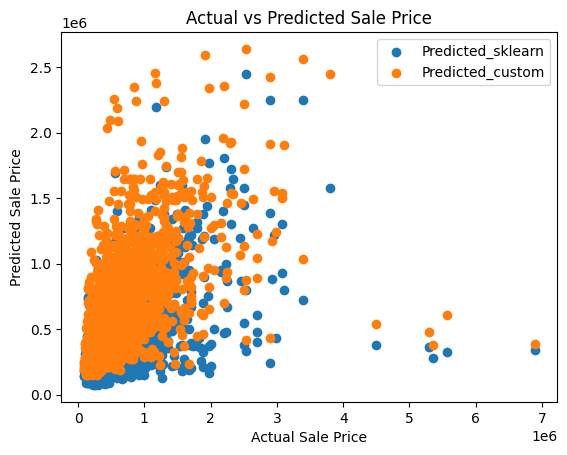

In [11]:
plt.scatter(y_test, y_pred, label='Predicted_sklearn')
plt.scatter(y_test, y_pred_custom, label='Predicted_custom')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.legend()
plt.show()

In [12]:
svm_model=SVC()
svm_model.fit(X_train,y_train)
y_pred_svm=svm_model.predict(X_test)

svm_mse=mean_squared_error(y_test,y_pred_svm)
svm_r2=r2_score(y_test,y_pred_svm)

print('MSE_sklearn:',mse)
print('R2_sklearn:',r2)

print('\nMSE_svm:',svm_mse)
print('R2_svm:',svm_r2,'\n')

MSE_sklearn: 118990767231.13277
R2_sklearn: 0.23779022253024173

MSE_svm: 192321718928.54587
R2_svm: -0.2319400739923514 

